<a href="https://colab.research.google.com/github/deniseiras/Time-Series-Credit-BCB/blob/main/Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - inadimplência de cartão de crédito

Autor: Denis M. A. Eiras

contato: denis.eiras@gmail.com

Atualizado em: 09/09/2023 12h:00

**Classification**

Nos mercados de crédito, um problema típico é saber se, dadas as informações de uma pessoa, ela pagará ou não sua dívida. A partir da base disponível em https://www.kaggle.com/datasets/uciml/default-of-credit-cardclients-dataset?resource=download gere um modelo preditivo de
classificação (variável target: ‘default.payment.next.month’), separe 30% da base para teste e traga métricas para validar o modelo em questão.




# Introdução

Com o rápido desenvolvimento da indústria de cartões de crédito, há um número crescente de taxas de inadimplência nos empréstimos, o que impõe um risco financeiro para os bancos comerciais. Portanto, resoluções bem-sucedidas dos riscos são importantes para o desenvolvimento saudável da indústria no longo prazo. Os métodos existentes, como o modelo FICO podem estimar as probabilidades de inadimplência do cartão de crédito, mas são totalmente baseados no julgamento subjetivo das pessoas. Além disso, os dados de inadimplência de cartão de crédito são sempre desbalanceados, sendo a maioria adimplentes, o que traz desafios para a construção do modelo de inadimplência. Na atual era do big data, os métodos de Machine Learning (ML) são populares por sua alta eficiência e alta precisão [1].

Em uma pesquisa sobre artigos mais bem citados sobre os modelos de ML mais utilizados, encontra-se o uso de algumas técnicas. Em [1], utilizou-se regressão logística, árvores de decisão e ensemble learning como Adaboosting e Random Forest para concluir que Random Forest são os melhores, atingindo uma acurácia de 82,12%. Em [2],regressão logística, a árvore de decisão rpart e a Random Forest foram usadas, onde novamente se identificou uma maior acurácia (81,81%) e área sob a curva (AUC) de 77% ao usar Random Forest, corroborando o trabalho de[1] e [3], que usaram o mesmo data set deste trabalho.

Em [3], analisou-se os métodos de feature selection Correlation-based Feature Selection (CFS) e InfoGain, mostrando que dentre diversos algoritmos de ML apenas NayveBayes e BayesNet se beneficiaram destes, e RandomForest obteve melhores resultados com o dataset completo. Outros trabalhos se beneficiaram utilizando técnicas de feature selection com Regressão Logística [1]  e (CFS) [2].

Outras técnicas como a Análise de Componentes Principais (Principal Component Analysis - PCA) não foram identificadas nos trabalhos. PCA é uma técnica de redução de dimensionalidade amplamente utilizada em análise de dados e aprendizado de máquina para simplificar conjuntos de dados complexos, reduzindo o número de variáveis (ou dimensões) enquanto mantém o máximo de informações possível.



# Metodologia

No Kaggle, existem diversas discussões sobre o DataSet, algumas delas respondidas pelo autor dos dados, como a escala para o status de "repayment", ou reembolso, com o valor = -2, que significa "nenhum consumo", que não estão explicadas no Dataset. Alguns autores de notebook simplemente alteram esse valor para zero (uso do crédito rotativo).

Outras dúvidas surgem como, como foi definido o comportamento inadimplente a ser predito ? Foi uma predição ou é um dado real? Essa questão surge após a análise de contas com nenhum valor em todos os meses e "repayment" = -2. A resposta do autor é simplesmente Y: client's behavior; Y=0 then not default, Y=1 then default".

Analisando estas discussões e verificando que feature selection não resultaram na melhor performance ao usar RandonForest em alguns trabalhos [3], este trabalho não fará uma análise do dataset e usará o algoritmo RandomForest. Outros motivos para isto são que o RandomForest é uma ótima escolha para se ajustar a outliers, e a substituir pré processamento de features, como no caso de variáveis ​​como Educação, Casamento e Salário, as quais mesclaram valores não conhecidos para "Outros" para dar mais sentido aos dados [2]. Ainda, será utilizada a técnica Principal Component Analysis (PCA) para reduzir a dimensionalidade dos dados pela metade, na tentativa de se identifcar as colunas mais efetivas

A metodologia consiste em:
1. Análise do dataset
2. Pré-processamento com PCA
3. Divisão em base de testes e treinamento
4. Construção dos modelos e uso de diferentes hiperparâmetros para avaliação sobre a base de testes
5. Avaliação e escolha dos melhores hiperparâmetros sobre a base de testes

Os passos da metodologia são detalhados em cada sub seção.





Inicialização de bibliotecas


In [1]:
# devtools::install_github("imbs-hl/ranger")

pacotes <- c('tidyverse',  # Pacote básico de datawrangling
             'viridis',
             'rpart',      # Biblioteca de árvores
             'rpart.plot', # Conjunto com Rpart, plota a parvore
             'gtools',     # funções auxiliares como quantcut,
             'scales',     # importa paletas de cores
             'caret',      # Funções úteis para machine learning
             'e1071',      # Para PCA
             'readr'       # ler dataset from url
#              'ranger',     # a c++ implementation of random forest
#              'h2o'         # a java-based implementation of random forest
             )

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
     install.packages(instalador, dependencies = T)
    break()}
  sapply(pacotes, require, character = T)
} else {
  sapply(pacotes, require, character = T)
}

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ratelimitr’, ‘htmlTable’, ‘future’, ‘R.oo’, ‘R.utils’, ‘later’, ‘triebeard’, ‘WikidataQueryServiceR’, ‘Hmisc’, ‘future.apply’, ‘httpuv’, ‘R.cache’, ‘minqa’, ‘RcppEigen’, ‘crosstalk’, ‘promises’, ‘urltools’, ‘rentrez’, ‘rncl’, ‘solrium’, ‘WikidataR’, ‘diagram’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘libcoin’, ‘multcomp’, ‘rex’, ‘plotmo’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘caTools’, ‘Cairo’, ‘doParallel’, ‘doRNG’, ‘plotly’, ‘randomNames’, ‘RSQLite’, ‘sn’, ‘crul’, ‘ape’, ‘bold’, ‘rredlist’, ‘rotl’, ‘ritis’, ‘worrms’, ‘natserv’, ‘wikitaxa’, ‘phangorn’, ‘brglm’, ‘prodlim’, ‘questionr’, ‘ROCR’, ‘strucchange’, ‘coin’, ‘sandwich’, ‘dichromat’, ‘mapproj’, ‘vdiffr’, ‘covr’, ‘terra’, ‘earth’, ‘car’, ‘gplots’, ‘SGP’, ‘taxize’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘Cubist’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’

tidyverse    viridis      rpart rpart.plot     gtools     scales      caret 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     e1071      readr 
      TRUE       TRUE

## 1) Análise do dataset



Carregamento do dataset
As série foi copiada para uma pasta púbilica do Dropbox, para facilitar

In [16]:
# Load required libraries
library(readr)

# Specify the URL for the dataset (direct link to the CSV file)
dataset_url <- "https://www.dropbox.com/scl/fi/6sr6i10t7oie7s1qwm9g9/UCI_Credit_Card.csv?rlkey=hy84q79rr47ndk8gsmtmiyrqd&dl=1"
file_path = "/content/UCI_Credit_Card.csv"
download.file(dataset_url, file_path)

credit_card_data <- read.csv(file_path)

Análise do data set

In [17]:
head(credit_card_data)
summary(credit_card_data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

## 2) Pré Processamento com PCA


In [18]:
# Number of components to retain PCA
train_cols_size <- ncol(credit_card_data)-2  # remove columns ID (0) and default (last)
train_cols_interval = 1:train_cols_size+1
data_train_columns = credit_card_data[, train_cols_interval]

colnames(data_train_columns)
ncol(data_train_columns) # checkin train cols
dim(data_train_columns)

pca_num_components <- train_cols_size / 2
pca_result <- prcomp(data_train_columns, scale. = TRUE)
data_pca_train <- predict(pca_result, newdata = data_train_columns)[, 1:pca_num_components]
train_col_names = colnames(data_pca_train)
train_col_names
data_pca <- cbind(data_pca_train, defvar = credit_card_data$default.payment.next.month)
data_pca <- as.data.frame(data_pca)
data_pca$defvar <- factor(data_pca$defvar, levels = c(0, 1), labels = c("No", "Yes"))
dim(data_pca)
head(data_pca)


[1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"     "BILL_AMT1"
[13] "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6" "PAY_AMT1" 
[19] "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6"

[1] 23

[1] 30000    23

[1] "PC1"  "PC2"  "PC3"  "PC4"  "PC5"  "PC6"  "PC7"  "PC8"  "PC9"  "PC10"
[11] "PC11"

[1] 30000    12

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,defvar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.8879310,0.90609354,-0.4877867,0.5400061,0.9979407,0.04440316,-0.62367631,-0.11279197,0.1898909,0.08460100,0.24535970,Yes
2,-0.7646830,2.10925241,1.0972952,0.4834717,0.8589659,-0.23509456,0.06474085,-0.09359350,0.1536970,-0.12403256,0.14170885,Yes
3,-0.8473938,1.07216109,0.4121714,0.4335567,0.7704799,0.01866472,-0.15046991,0.09188216,0.1561766,-0.08916925,0.04622141,No
4,-0.1965853,0.80900807,-0.8186287,-0.2928734,0.9093509,-0.28464020,0.23521694,0.06298319,-0.1146105,0.06700614,0.02131733,No
5,-0.8409201,0.07253681,-1.0052407,-2.3279745,-1.0231067,0.79431701,0.71105723,-0.12418877,-0.6025176,0.30747309,1.03583122,No
6,-0.1837364,0.83994548,0.3578153,0.7481763,-1.4676916,0.36023019,0.27586185,0.13884023,-0.1533063,0.18480512,-0.02458419,No


## 3) Divisão da base em base de testes e treinamento

A divisão entre a base de treinamento e testes é balanceada com relação à coluna prevista 'default', com proporção 70%/30%.

In [19]:
get_train_test_sets <- function (data) {
  train_proportion <- 0.7

  # Split the data into training and testing sets while balancing classes
  positive_samples <- data[data$defvar == "No", ]
  negative_samples <- data[data$defvar == "Yes", ]
  num_positive_samples_train <- ceiling(nrow(positive_samples) * train_proportion)
  num_negative_samples_train <- ceiling(nrow(negative_samples) * train_proportion)
  # Sample the required number of samples for each class
  train_positive_samples <- positive_samples[1:num_positive_samples_train, ]
  train_negative_samples <- negative_samples[1:num_negative_samples_train, ]
  # Combine the samples to create the training set
  train_data <- rbind(train_positive_samples, train_negative_samples)
  # Create the testing set by excluding the samples used for training
  test_data <- data[!rownames(data) %in% rownames(train_data), ]

  # Check class balance in the training and testing sets
  cat("Train data set\n No / Yes \n")
  cat(table(train_data$defvar))
  cat("\nTest data set\n No / Yes \n")
  cat(table(test_data$defvar))
  cat("\n")

  result <- list(train_data=train_data, test_data=test_data)
  return(result)

}

## 4) Construção dos modelos
Para avaliação dos melhores modelos na base de avaliação, foi usada a métrica AUC. A métrica Receiver Operating Characteristic (ROC) é uma representação gráfica e uma métrica de avaliação popular para modelos de classificação binária. É usado para avaliar o desempenho de um classificador, principalmente em cenários onde a distribuição de classes é desequilibrada. A análise da curva ROC, AUC, concentra-se no equilíbrio entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) em diferentes limites de classificação.

A avaliação dos melhores modelos na base de testes é feita usando acurácia, pois esta é a mais utilizada nos trabalhos pesquisados.

Para a avaliação se executou 3 vezes:
- Divisão da base em treino e testes (70%/30%)
- Para cada configuração de tamanho de árvore, executa-se o treinamento:
  - k-folds=5
  - variação da seleção de variáveis de 1 até o máximo de variáveis PCA
  - escolha do melhor modelo na base de validação usando AUC
  - validação resultado na base de testes usando acurácia

Em seguida, armazena-se a configuração e métricas do melhor modelo, em termos de acurácia na base de testes.





In [22]:
# helper function for the plots
tune_plot <- function(x, probs = .80) {
  ggplot(x) +
    coord_cartesian(ylim = c(max(x$results$AUC), min(x$results$AUC))) +
    theme_bw()
}

### Treinamento e Hiperparâmetrização





=====> Training execution started: 1 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10
Train time =  25.6514637470245
Train Base best models
   mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 1.238498 0.6999950 0.5325664 0.7831531 0.2593494 0.8686049
11   11 1.296887 0.6985481 0.5297640 0.7816292 0.2549723 0.8676410
5     5 1.246571 0.6978164 0.5405571 0.7850577 0.2609521 0.8700408
10   10 1.274197 0.6965627 0.5317158 0.7825818 0.2595127 0.8681431
8     8 1.254925 0.6957707 0.5322793 0.7812960 0.2499593 0.8676518

Test Base results
      Predicted
Actual   No  Yes
   No  6558  451
   Yes 1408  582

True Positive (TP): 582 
True Negative (TN): 6558 
False Positive (FP): 451 
False Negative (FN): 1408 
Sensitivity (True Positive Rate): 0.2924623 
Specificity (True Negative Rate): 0.9356542 
Precision: 0.5634076 
F1 Score: 0.385048 
Accuracy: 0.7934215 

Ntree =  50
Train time =  1.57501891454061
Train Base best models
   mtry

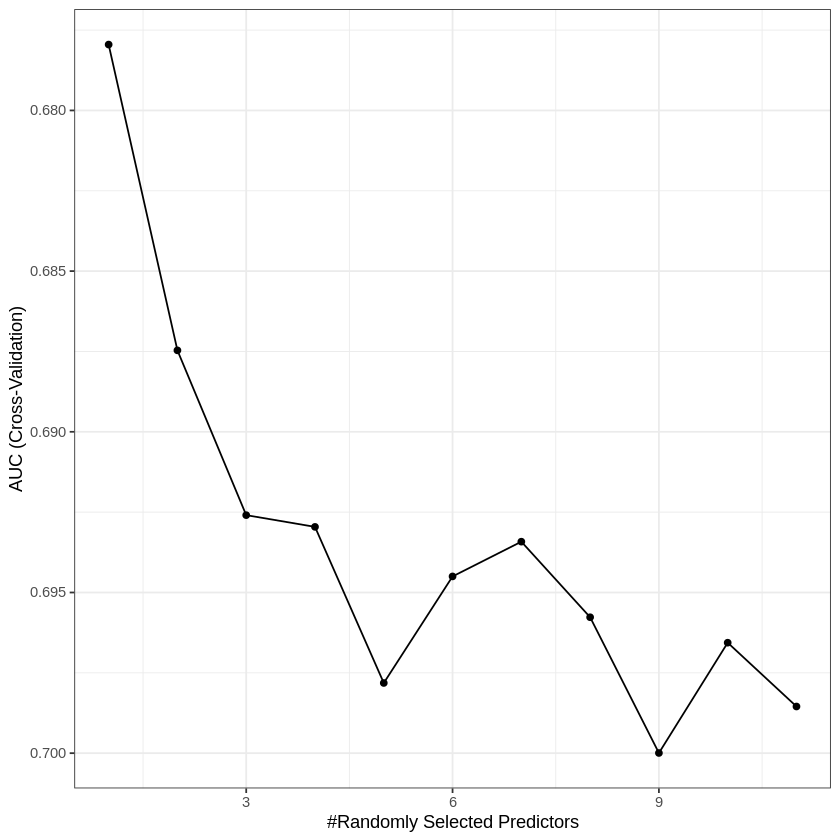


Train time =  3.16693559487661
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4820136 0.7327590 0.6750073 0.7977236 0.2913909 0.8784077
9     9 0.4760457 0.7318506 0.6725923 0.7956285 0.2852071 0.8770861
8     8 0.4765017 0.7306861 0.6719619 0.7959619 0.2869804 0.8772539
11   11 0.4823152 0.7301775 0.6698430 0.7945809 0.2872980 0.8761486
5     5 0.4755197 0.7297747 0.6722989 0.7975331 0.2874344 0.8784664

Test Base results
      Predicted
Actual   No  Yes
   No  6677  332
   Yes 1416  574

True Positive (TP): 574 
True Negative (TN): 6677 
False Positive (FP): 332 
False Negative (FN): 1416 
Sensitivity (True Positive Rate): 0.2884422 
Specificity (True Negative Rate): 0.9526323 
Precision: 0.6335541 
F1 Score: 0.3964088 
Accuracy: 0.8057562 

Ntree =  200

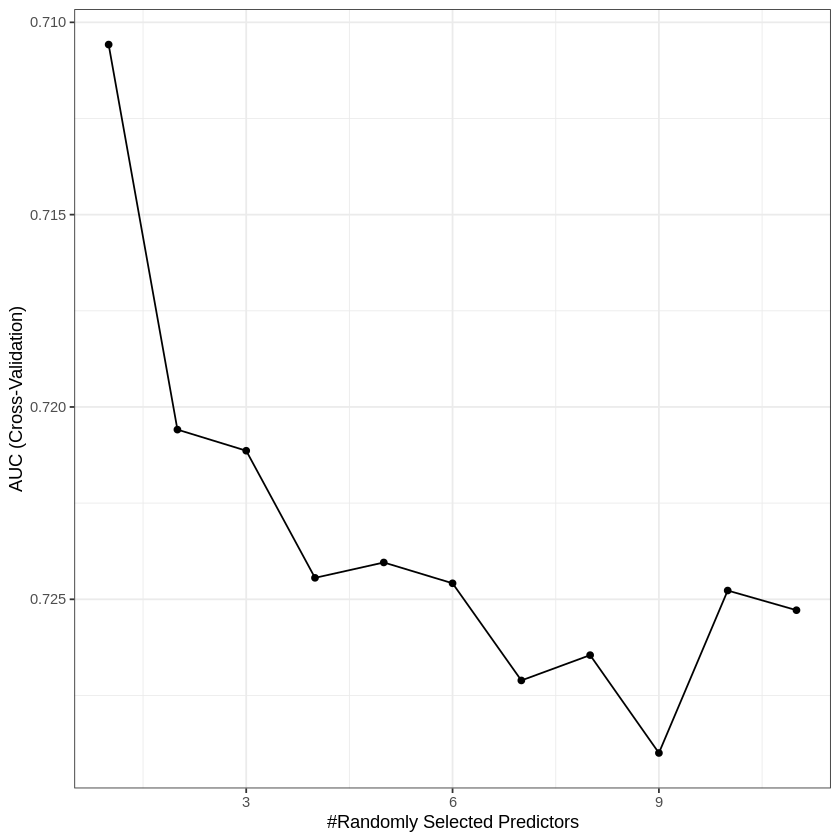


Train time =  5.99808714787165
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
5     5 0.4662039 0.7336062 0.6774491 0.7976760 0.2869104 0.8786047
9     9 0.4678604 0.7335734 0.6769221 0.7956762 0.2858344 0.8770897
8     8 0.4677034 0.7332918 0.6765833 0.7963902 0.2883929 0.8775162
7     7 0.4684954 0.7330662 0.6774486 0.7974854 0.2903320 0.8782758
11   11 0.4738341 0.7329802 0.6743169 0.7947237 0.2871858 0.8762673

Test Base results
      Predicted
Actual   No  Yes
   No  6686  323
   Yes 1427  563

True Positive (TP): 563 
True Negative (TN): 6686 
False Positive (FP): 323 
False Negative (FN): 1427 
Sensitivity (True Positive Rate): 0.2829146 
Specificity (True Negative Rate): 0.9539164 
Precision: 0.6354402 
F1 Score: 0.391516 
Accuracy: 0.8055339 

Ntree =  300

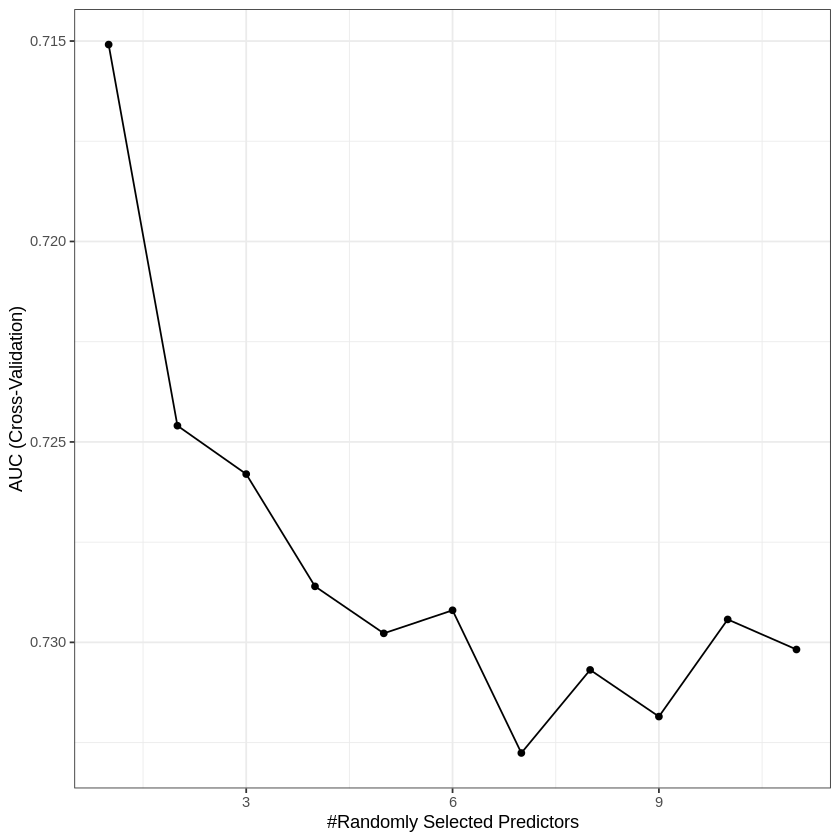


Train time =  8.98123360872269
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4667599 0.7348686 0.6780348 0.7962475 0.2894284 0.8773490
5     5 0.4655282 0.7340550 0.6779588 0.7986761 0.2898542 0.8792358
8     8 0.4672112 0.7335755 0.6770270 0.7971521 0.2912088 0.8779673
11   11 0.4683921 0.7334122 0.6758486 0.7967711 0.2930115 0.8775704
7     7 0.4678606 0.7332404 0.6782465 0.7980091 0.2920628 0.8785955

Test Base results
      Predicted
Actual   No  Yes
   No  6676  333
   Yes 1394  596

True Positive (TP): 596 
True Negative (TN): 6676 
False Positive (FP): 333 
False Negative (FN): 1394 
Sensitivity (True Positive Rate): 0.2994975 
Specificity (True Negative Rate): 0.9524897 
Precision: 0.6415501 
F1 Score: 0.408359 
Accuracy: 0.8080898 



=====> Training execution started: 2 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10

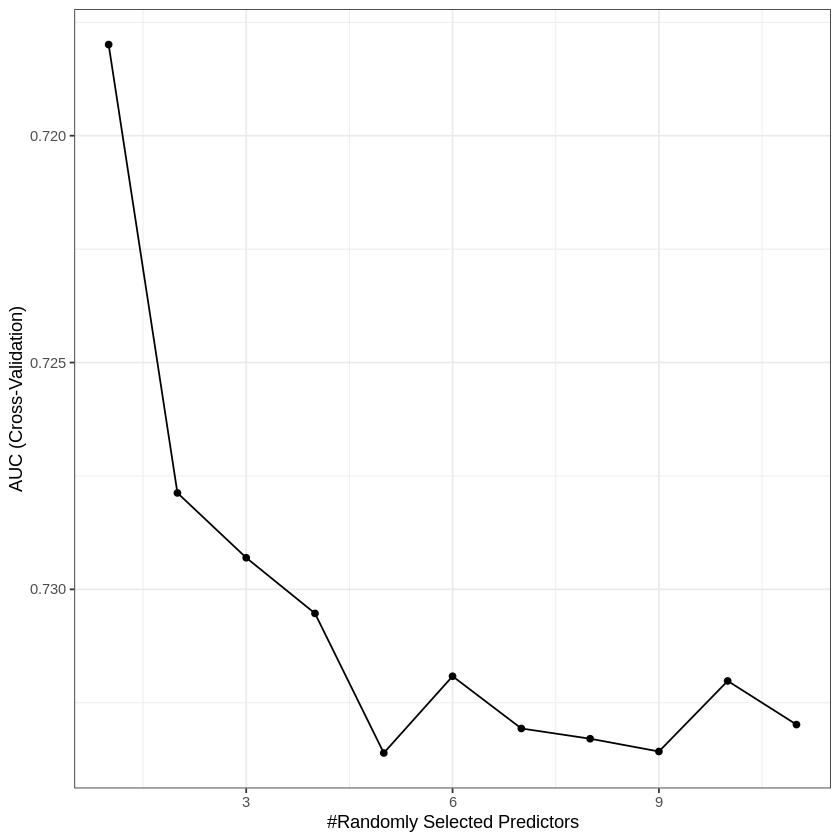


Train time =  25.3385207653046
Train Base best models
  mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
6    6 1.211983 0.7021122 0.5379646 0.7838677 0.2526529 0.8695493
9    9 1.228425 0.7004777 0.5337674 0.7836296 0.2576741 0.8690839
4    4 1.203637 0.7001040 0.5445033 0.7844392 0.2576730 0.8697306
8    8 1.246905 0.6997093 0.5396940 0.7870580 0.2708968 0.8710751
7    7 1.255005 0.6985199 0.5398666 0.7849151 0.2601400 0.8699659

Test Base results
      Predicted
Actual   No  Yes
   No  6566  443
   Yes 1409  581

True Positive (TP): 581 
True Negative (TN): 6566 
False Positive (FP): 443 
False Negative (FN): 1409 
Sensitivity (True Positive Rate): 0.2919598 
Specificity (True Negative Rate): 0.9367955 
Precision: 0.5673828 
F1 Score: 0.3855342 
Accuracy: 0.7941994 

Ntree =  50

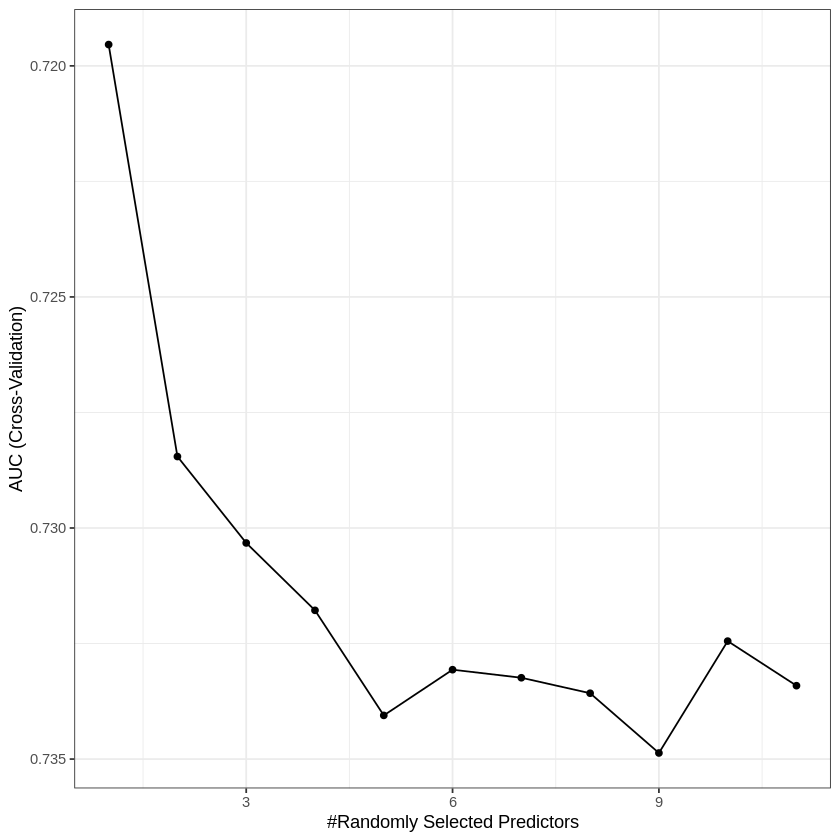


Train time =  1.55628668069839
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.5133355 0.7303507 0.6632313 0.7963909 0.2860798 0.8776381
8     8 0.5082377 0.7297509 0.6642195 0.7959622 0.2868040 0.8772639
11   11 0.5157532 0.7296563 0.6608231 0.7937244 0.2819239 0.8757546
7     7 0.5159359 0.7295272 0.6653499 0.7974384 0.2892733 0.8782937
6     6 0.5155943 0.7295169 0.6662616 0.7969146 0.2856373 0.8780717

Test Base results
      Predicted
Actual   No  Yes
   No  6649  360
   Yes 1415  575

True Positive (TP): 575 
True Negative (TN): 6649 
False Positive (FP): 360 
False Negative (FN): 1415 
Sensitivity (True Positive Rate): 0.2889447 
Specificity (True Negative Rate): 0.9486375 
Precision: 0.6149733 
F1 Score: 0.3931624 
Accuracy: 0.8027559 

Ntree =  100

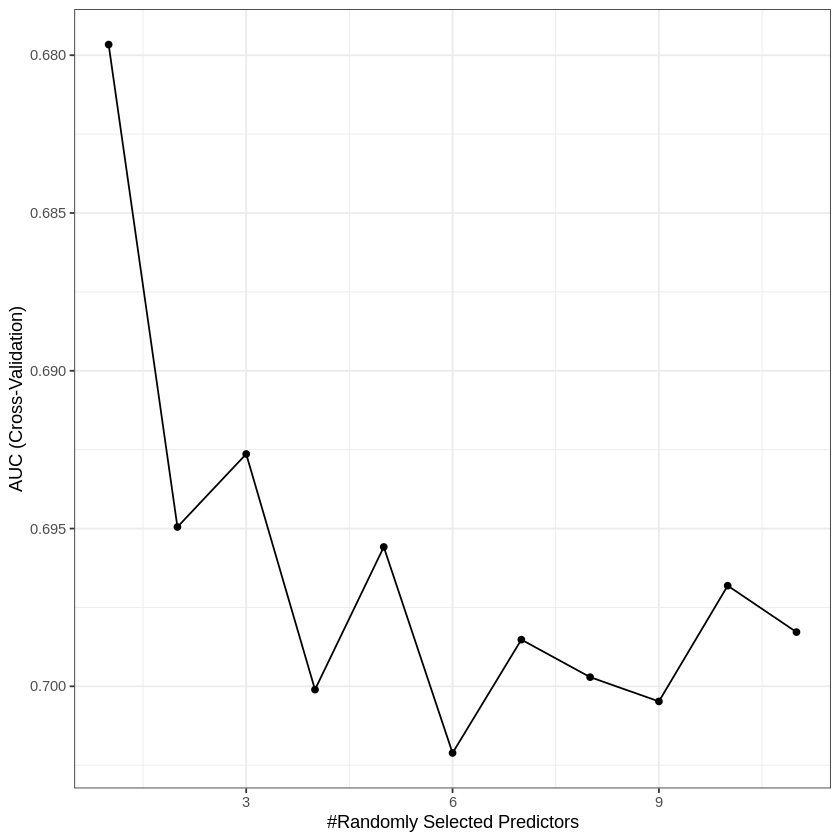


Train time =  2.96193387508392
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4682313 0.7362886 0.6773296 0.7972957 0.2874806 0.8782744
7     7 0.4742593 0.7351711 0.6762738 0.7977240 0.2898763 0.8784856
11   11 0.4742851 0.7350727 0.6744285 0.7965337 0.2899452 0.8775422
6     6 0.4749389 0.7350324 0.6777866 0.7982956 0.2909764 0.8788753
5     5 0.4689745 0.7344827 0.6771691 0.7983431 0.2901291 0.8789583

Test Base results
      Predicted
Actual   No  Yes
   No  6666  343
   Yes 1403  587

True Positive (TP): 587 
True Negative (TN): 6666 
False Positive (FP): 343 
False Negative (FN): 1403 
Sensitivity (True Positive Rate): 0.2949749 
Specificity (True Negative Rate): 0.9510629 
Precision: 0.6311828 
F1 Score: 0.4020548 
Accuracy: 0.8059784 

Ntree =  200

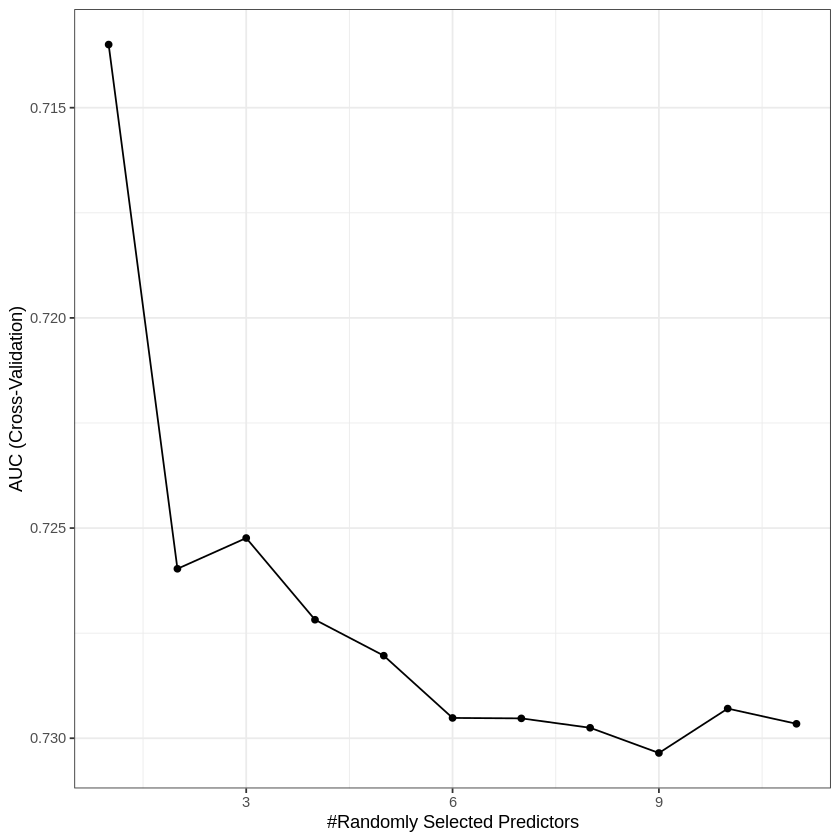


Train time =  5.96470963160197
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4644568 0.7377473 0.6804002 0.7979623 0.2905568 0.8786368
9     9 0.4660005 0.7375455 0.6814014 0.7987241 0.2947405 0.8790155
8     8 0.4647995 0.7372005 0.6803823 0.7988670 0.2973116 0.8789915
6     6 0.4653291 0.7370250 0.6814113 0.7986289 0.2903863 0.8791665
11   11 0.4676137 0.7369672 0.6787136 0.7983432 0.2953930 0.8786801

Test Base results
      Predicted
Actual   No  Yes
   No  6674  335
   Yes 1421  569

True Positive (TP): 569 
True Negative (TN): 6674 
False Positive (FP): 335 
False Negative (FN): 1421 
Sensitivity (True Positive Rate): 0.2859296 
Specificity (True Negative Rate): 0.9522043 
Precision: 0.6294248 
F1 Score: 0.3932274 
Accuracy: 0.8048672 

Ntree =  300

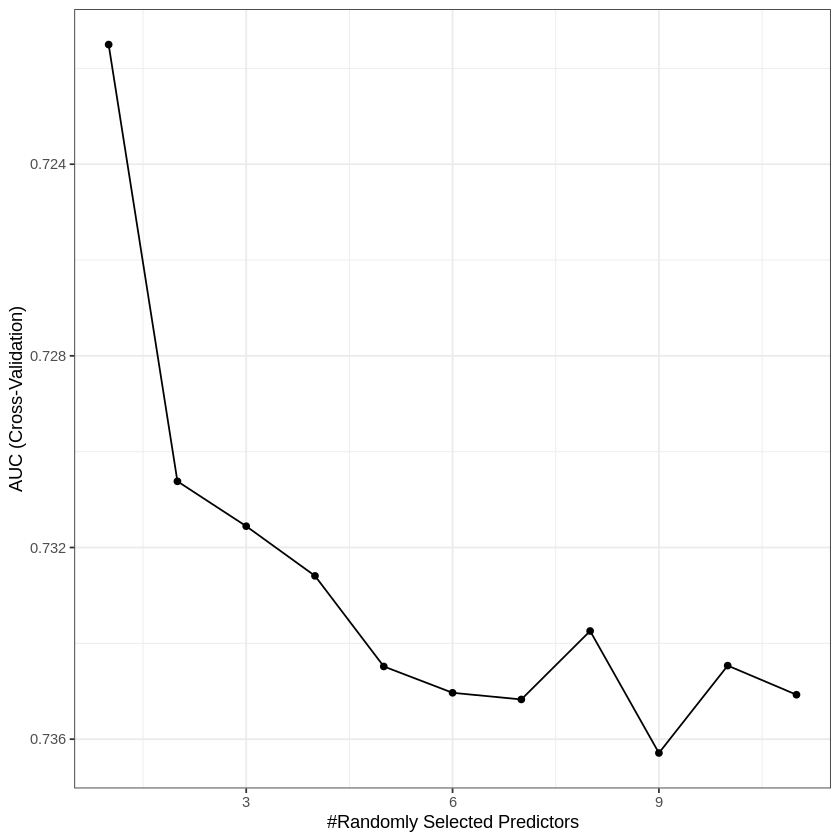


Train time =  9.00482927163442
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4632318 0.7388149 0.6817025 0.7984861 0.2918078 0.8789815
8     8 0.4637642 0.7382610 0.6813023 0.7991051 0.2971846 0.8791831
11   11 0.4648711 0.7381023 0.6801052 0.7987718 0.2960714 0.8789808
9     9 0.4640953 0.7380570 0.6814382 0.7986289 0.2933794 0.8790114
5     5 0.4625230 0.7377498 0.6819155 0.7984860 0.2892790 0.8791142

Test Base results
      Predicted
Actual   No  Yes
   No  6670  339
   Yes 1419  571

True Positive (TP): 571 
True Negative (TN): 6670 
False Positive (FP): 339 
False Negative (FN): 1419 
Sensitivity (True Positive Rate): 0.2869347 
Specificity (True Negative Rate): 0.9516336 
Precision: 0.6274725 
F1 Score: 0.3937931 
Accuracy: 0.804645 



=====> Training execution started: 3 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10

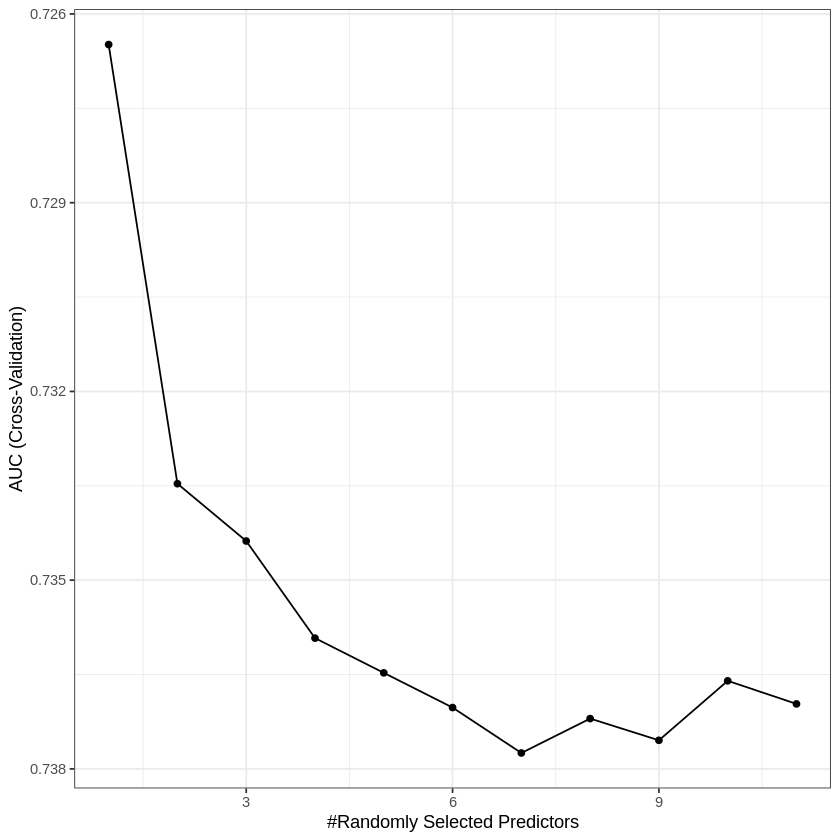


Train time =  25.8847279548645
Train Base best models
   mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
11   11 1.306647 0.7041716 0.5377581 0.7858191 0.2732741 0.8699516
7     7 1.238188 0.7022951 0.5348868 0.7841523 0.2542952 0.8696840
8     8 1.280921 0.7009525 0.5315396 0.7802005 0.2464847 0.8669788
9     9 1.221495 0.7004499 0.5331144 0.7827242 0.2557348 0.8684727
10   10 1.242435 0.6990843 0.5337671 0.7842003 0.2642592 0.8691701

Test Base results
      Predicted
Actual   No  Yes
   No  6512  497
   Yes 1433  557

True Positive (TP): 557 
True Negative (TN): 6512 
False Positive (FP): 497 
False Negative (FN): 1433 
Sensitivity (True Positive Rate): 0.2798995 
Specificity (True Negative Rate): 0.9290912 
Precision: 0.528463 
F1 Score: 0.3659658 
Accuracy: 0.7855317 

Ntree =  50

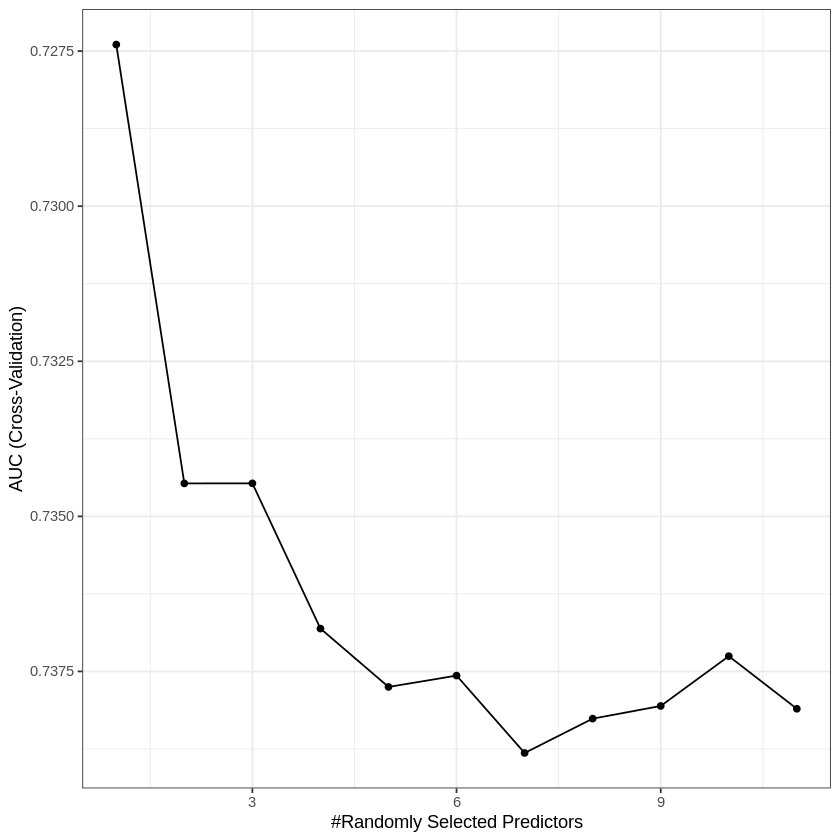


Train time =  1.5402282834053
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.5128644 0.7348104 0.6657402 0.7973902 0.2905748 0.8781890
10   10 0.5082499 0.7318062 0.6620774 0.7961048 0.2890576 0.8772577
8     8 0.5017777 0.7316840 0.6639719 0.7957236 0.2857158 0.8771328
6     6 0.4916074 0.7308665 0.6652169 0.7966284 0.2870883 0.8777728
5     5 0.4970654 0.7305236 0.6667920 0.7971997 0.2875126 0.8782005

Test Base results
      Predicted
Actual   No  Yes
   No  6654  355
   Yes 1427  563

True Positive (TP): 563 
True Negative (TN): 6654 
False Positive (FP): 355 
False Negative (FN): 1427 
Sensitivity (True Positive Rate): 0.2829146 
Specificity (True Negative Rate): 0.9493508 
Precision: 0.6132898 
F1 Score: 0.3872077 
Accuracy: 0.801978 

Ntree =  100

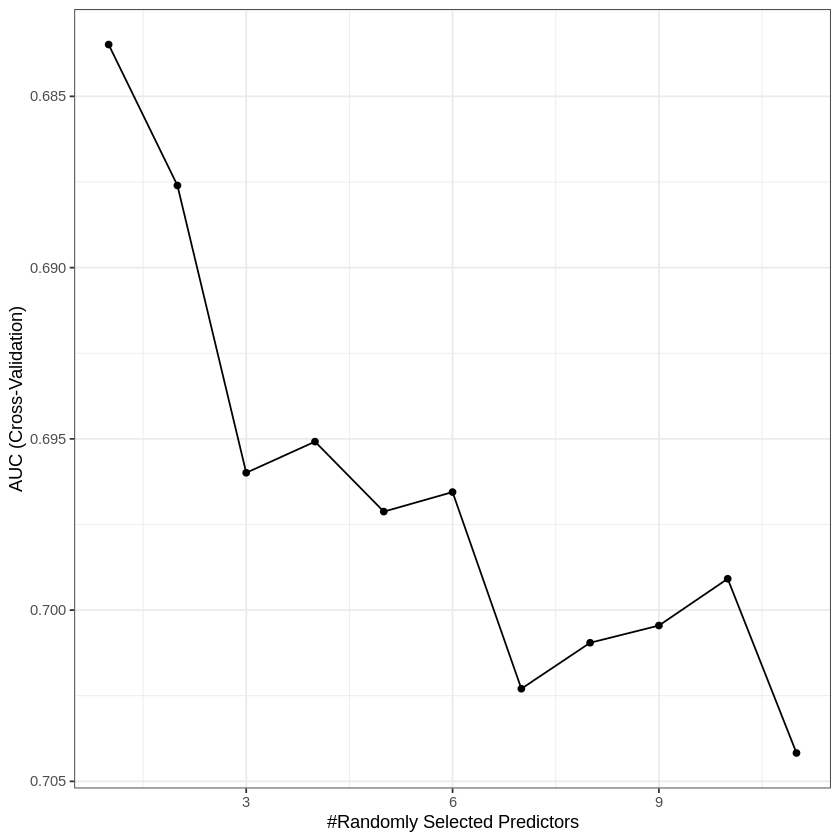


Train time =  2.96642393271128
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4677592 0.7381416 0.6787986 0.7987712 0.2932330 0.8791340
8     8 0.4786553 0.7370534 0.6779636 0.7987236 0.2948155 0.8790121
10   10 0.4741441 0.7364437 0.6766808 0.7975809 0.2936224 0.8781775
9     9 0.4729726 0.7360989 0.6761851 0.7972952 0.2924740 0.8780134
11   11 0.4774710 0.7360867 0.6763726 0.7971046 0.2933981 0.8778142

Test Base results
      Predicted
Actual   No  Yes
   No  6667  342
   Yes 1416  574

True Positive (TP): 574 
True Negative (TN): 6667 
False Positive (FP): 342 
False Negative (FN): 1416 
Sensitivity (True Positive Rate): 0.2884422 
Specificity (True Negative Rate): 0.9512056 
Precision: 0.6266376 
F1 Score: 0.3950447 
Accuracy: 0.804645 

Ntree =  200

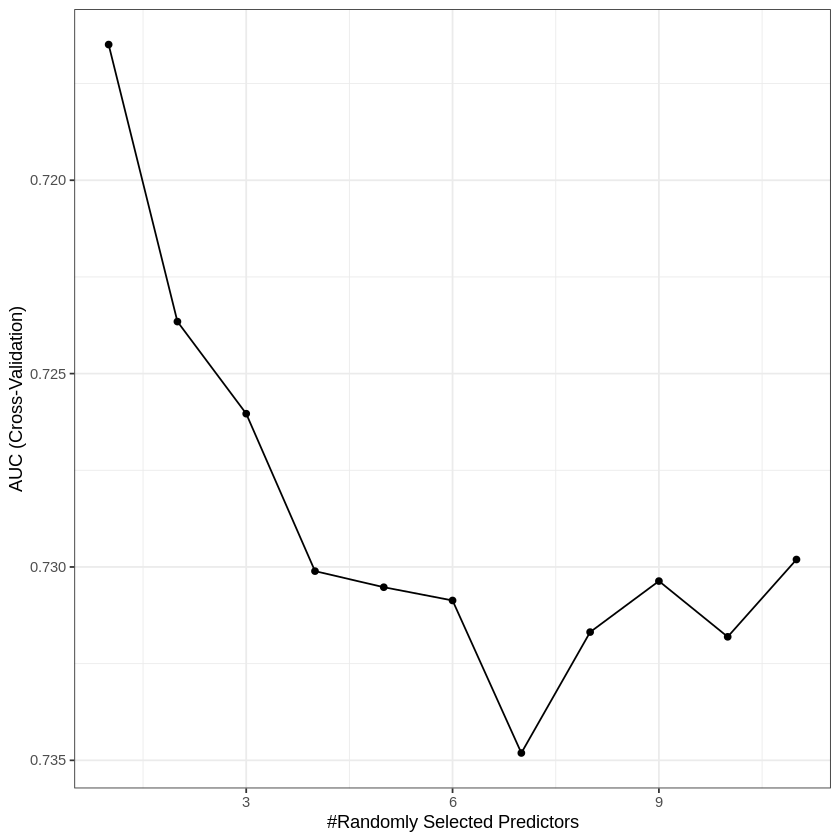


Train time =  5.96333904663722
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4632293 0.7395459 0.6824001 0.7993427 0.2957746 0.8794489
8     8 0.4646679 0.7394968 0.6830451 0.7985329 0.2945644 0.8788759
10   10 0.4659665 0.7387632 0.6813961 0.7990569 0.2986910 0.8790695
9     9 0.4645503 0.7387406 0.6806234 0.7974380 0.2926407 0.8781163
11   11 0.4647825 0.7385565 0.6817699 0.7985807 0.2971625 0.8787762

Test Base results
      Predicted
Actual   No  Yes
   No  6668  341
   Yes 1410  580

True Positive (TP): 580 
True Negative (TN): 6668 
False Positive (FP): 341 
False Negative (FN): 1410 
Sensitivity (True Positive Rate): 0.2914573 
Specificity (True Negative Rate): 0.9513483 
Precision: 0.6297503 
F1 Score: 0.3984885 
Accuracy: 0.8054228 

Ntree =  300

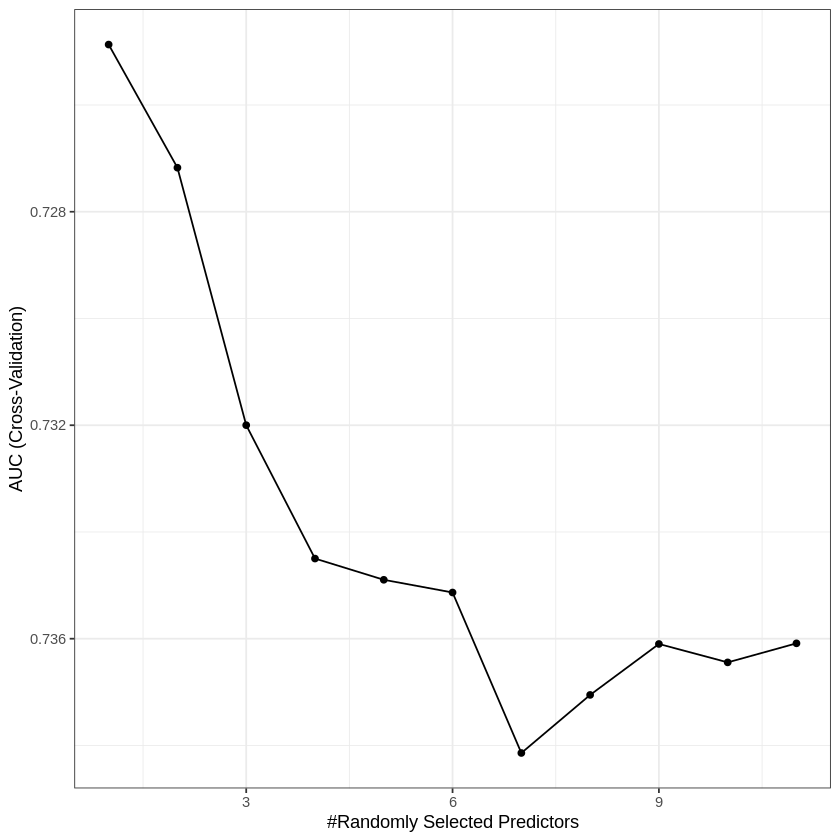


Train time =  8.85605744918187
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
8     8 0.4623843 0.7405598 0.6837807 0.8000091 0.2984959 0.8798294
7     7 0.4623260 0.7401787 0.6835745 0.7986761 0.2947597 0.8789790
11   11 0.4637084 0.7395585 0.6825240 0.7989616 0.2983690 0.8790119
10   10 0.4635628 0.7393171 0.6826977 0.7985807 0.2966287 0.8788046
9     9 0.4636472 0.7392770 0.6815889 0.7993426 0.2966842 0.8794004


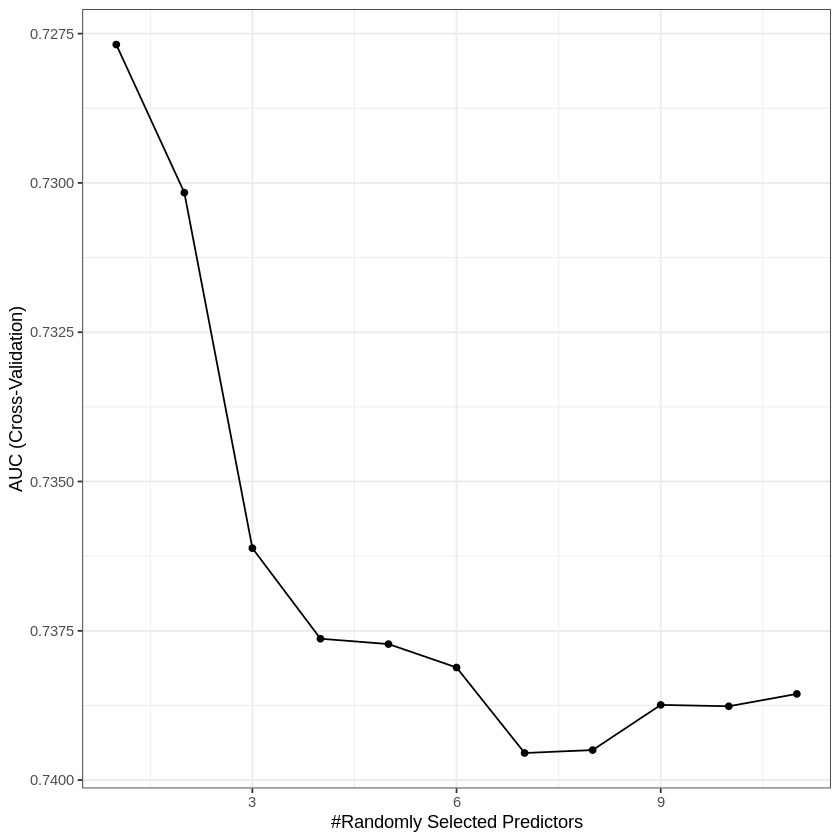


Test Base results
      Predicted
Actual   No  Yes
   No  6655  354
   Yes 1403  587

True Positive (TP): 587 
True Negative (TN): 6655 
False Positive (FP): 354 
False Negative (FN): 1403 
Sensitivity (True Positive Rate): 0.2949749 
Specificity (True Negative Rate): 0.9494935 
Precision: 0.6238045 
F1 Score: 0.4005459 
Accuracy: 0.8047561 


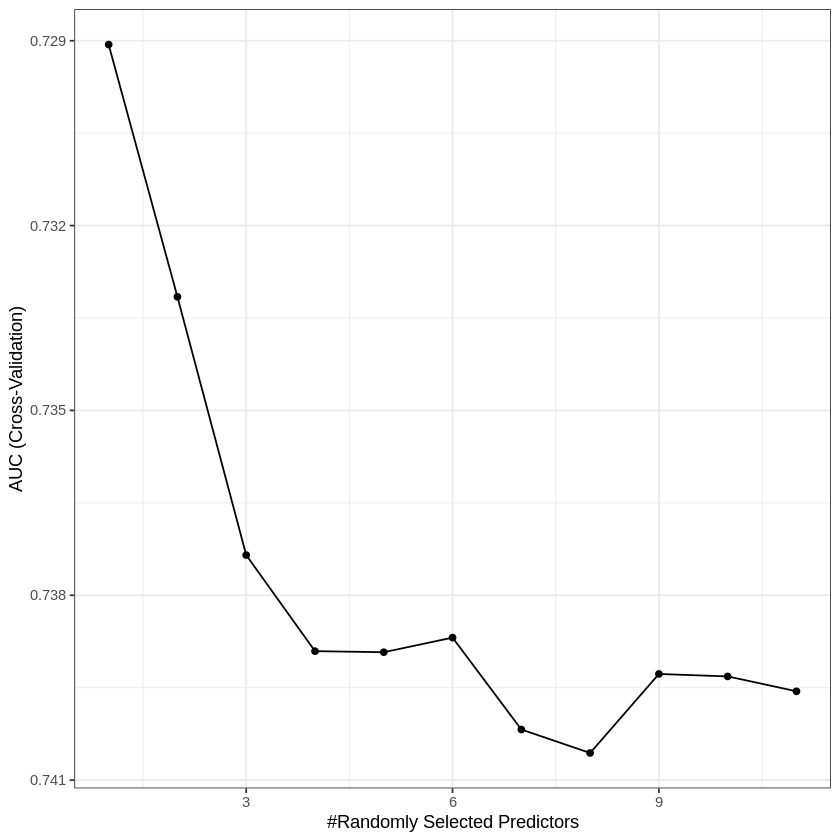

In [24]:
# execution parameters
#
times_execution_all = 3
best_cv_num = 4
metric='AUC'
tree_hyperparams = c(10, 50, 100, 200, 300)

control_improved <- caret::trainControl(
    method = "cv",            # Cross-validation method (e.g., repeated k-fold)
    number = best_cv_num,             # Number of folds
    summaryFunction = multiClassSummary,  # Evaluation metric (AUC, sensitivity, specificity)
    classProbs = TRUE, # needed to calc metrics
    savePredictions = TRUE  # Save predictions for analysis
)
# tune grid using 1 to max pca components
tune_grid <- expand.grid(
  mtry = c(1:pca_num_components)
)

var_seed = 42 # Set a random seed for reproducibility, changed each time it executes all
# saves the best results
rf_best_tune_grid.mtry <- 0
rf_best_tune_grid.ntree <- 0
rf_best_tune_grid.precision <- 0
rf_best_tune_grid.F1_score <- 0
rf_best_tune_grid.accuracy <- 0
rf_best_tune_grid.metric_used <- 0
modellist <- list()

for (t in seq_len(times_execution_all)) {

  cat(paste("\n\n\n=====> Training execution started:", t, "\n"))
  var_seed = var_seed*2
  set.seed(var_seed)
  tt <- get_train_test_sets(data_pca)
  training_data <- tt$train_data
  testing_data <- tt$test_data

  for (ntree in tree_hyperparams ){
      cat(paste("\nNtree = ", ntree))

      tempo_ini <- Sys.time()
      set.seed(var_seed)
      rf_base <- train(
                defvar ~ .,
                data = training_data[,c(colnames(training_data))],
                method = "rf",
                metric = metric,
                trControl = control_improved,
                tuneGrid = tune_grid,
                ntree = ntree
      )
      tempo_fim <- Sys.time()
      cat(paste("\nTrain time = ", tempo_fim - tempo_ini))

      key <- toString(ntree)
      modellist[[key]] <- rf_base

      class_train <- predict(rf_base, training_data)
      class_test  <- predict(rf_base, testing_data)

      cat("\nTrain Base best models\n=============\n")
      tmp <- rf_base$results[order(rf_base$results[,metric],decreasing=TRUE),] %>% head(5)
      print(tmp[1:7])
      print(tune_plot(rf_base, metric))

      actual <- testing_data$defvar
      predicted <- class_test
      confusion_matrix <- table(Actual = actual, Predicted = predicted)
      # Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
      TP <- confusion_matrix[2, 2]  # Actual 1, Predicted 1
      TN <- confusion_matrix[1, 1]  # Actual 0, Predicted 0
      FP <- confusion_matrix[1, 2]  # Actual 0, Predicted 1
      FN <- confusion_matrix[2, 1]  # Actual 1, Predicted 0
      # Calculate Sensitivity (True Positive Rate)
      sensitivity <- TP / (TP + FN)
      # Calculate Specificity (True Negative Rate)
      specificity <- TN / (TN + FP)
      # Calculate Precision
      precision <- TP / (TP + FP)
      # Calculate F1 Score
      F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)
      # Calculate Accuracy
      accuracy <- (TP + TN) / sum(confusion_matrix)
      metric_used = accuracy

      # Print the results
      cat("\nTest Base results\n=============\n")
      print(confusion_matrix)
      cat("\nTrue Positive (TP):", TP, "\n")
      cat("True Negative (TN):", TN, "\n")
      cat("False Positive (FP):", FP, "\n")
      cat("False Negative (FN):", FN, "\n")
      cat("Sensitivity (True Positive Rate):", sensitivity, "\n")
      cat("Specificity (True Negative Rate):", specificity, "\n")
      cat("Precision:", precision, "\n")
      cat("F1 Score:", F1_score, "\n")
      cat("Accuracy:", accuracy, "\n")

      if(metric_used > rf_best_tune_grid.metric_used) {
          rf_best_tune_grid.mtry = rf_base$bestTune$mtry
          rf_best_tune_grid.ntree = ntree
          rf_best_tune_grid.precision = precision
          rf_best_tune_grid.F1_score = F1_score
          rf_best_tune_grid.accuracy = accuracy
          rf_best_tune_grid.sensitivity = sensitivity
          rf_best_tune_grid.specificity = specificity
      }

  }
}

# Resultados

## 5) Avaliação na base de testes


Seleção dos melhores modelos de cada arquitetura


In [25]:
cat("\
# Calculate Sensitivity (True Positive Rate)\
sensitivity <- TP / (TP + FN)\n\
# Calculate Specificity (True Negative Rate)\
specificity <- TN / (TN + FP)\n\
# Calculate Precision\
precision <- TP / (TP + FP)\n\
# Calculate F1 Score\
F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)\n\
# Calculate Accuracy\
accuracy <- (TP + TN) / sum(confusion_matrix)\n\
")

# Compare results
results <- resamples(modellist)
summary(results)

paste("Best ntree: ", rf_best_tune_grid.ntree)
paste("Best mtry : ", rf_best_tune_grid.mtry)

paste("Best Specificity  : ", rf_best_tune_grid.specificity)
paste("Best Sensitivity  : ", rf_best_tune_grid.sensitivity)
paste("Best precision : ", rf_best_tune_grid.precision)
paste("Best Accuracy  : ", rf_best_tune_grid.accuracy)
paste("Best F1        : ", rf_best_tune_grid.F1_score)




# Calculate Sensitivity (True Positive Rate)
sensitivity <- TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity <- TN / (TN + FP)

# Calculate Precision
precision <- TP / (TP + FP)

# Calculate F1 Score
F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate Accuracy
accuracy <- (TP + TN) / sum(confusion_matrix)




Call:
summary.resamples(object = results)

Models: 10, 50, 100, 200, 300 
Number of resamples: 4 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
10  0.7811012 0.7814181 0.7851630 0.7858191 0.7895639 0.7918492    0
50  0.7933333 0.7948755 0.7972377 0.7973902 0.7997524 0.8017520    0
100 0.7963422 0.7972284 0.7978287 0.7987712 0.7993715 0.8030851    0
200 0.7967619 0.7980188 0.7989523 0.7993427 0.8002761 0.8027042    0
300 0.7971429 0.7972568 0.7999995 0.8000091 0.8027519 0.8028947    0

AUC 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
10  0.6933228 0.6995699 0.7034739 0.7041716 0.7080756 0.7164157    0
50  0.7272900 0.7324255 0.7346114 0.7348104 0.7369962 0.7427287    0
100 0.7307358 0.7347073 0.7386570 0.7381416 0.7420912 0.7445165    0
200 0.7328850 0.7362160 0.7394878 0.7395459 0.7428178 0.7463231    0
300 0.7334575 0.7377434 0.7413708 0.7405598 0.7441872 0.7460399    0

Balanced_Accuracy 
         Min.   1st Qu.    Median   

[1] "Best ntree:  300"

[1] "Best mtry :  8"

[1] "Best Specificity  :  0.949493508346412"

[1] "Best Sensitivity  :  0.294974874371859"

[1] "Best precision :  0.623804463336876"

[1] "Best Accuracy  :  0.804756084009334"

[1] "Best F1        :  0.400545888775162"

# Conclusão

O trabalho utilizou a técnica RandomForest, que foi a mais acurada técnica encontrada nos trabalhos pesquisados. De modo geral, RandomForest tem a maior precisão em modelos não balanceados e é executada rapidamente.

A inovação deste trabalho, dentro da simples pesquisa de outros trabalhos realizada, foi a utilização do PCA para a escolha das melhores features e uma maior velocidade de treinamento.

Os resultados mostraram que o uso do PCA com 11 componentes foi suficiente para a escolha da melhor configuração na base de testes: 8 componentes e 300 árvores, acurácia de 80,47%, um pouco abaixo dos 82% encontrado em outros trabalhos.

Em futuros trabalhos, pretende-se fazer a mesma avaliação sem o PCA, para comparação de acurácia e velocidade de treinamento com PCA. Também, variar mais parâmetros da RandomForest e utilizar outras métricas no treinamento. Ainda, balancear as bases em razão da quantidade de default e não default, o que revelou ser uma das principais técnicas usadas nos trabalhos pesquisados que aumentou consideravelmente a acurácia sobre a predição de inadimplentes.


# REFERÊNCIAS


[1] - https://ieeexplore.ieee.org/abstract/document/9275986?casa_token=CQKs1zfn9ZIAAAAA:Y6-Iu4U6b8DClAZVmgN8x-HdwQP2u2TAWwI2N_BU3JAVvqtuGfPAe1-DqUDiX4OWP66VTnFHMaM

[2] - https://ieeexplore.ieee.org/abstract/document/8776802?casa_token=VXxrW6tZNV8AAAAA:IuUNnSGEFwJIJ98iMFm7fQ8ulI79EbkukcZh3AX7yjw9tlavxRZQQ-MRUmq_hJXj39Wgl8zJBZM

[3] - https://www.ijcaonline.org/archives/volume145/number7/ajay-2016-ijca-910702.pdf


